In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/netflix1.csv')
display(df.head())

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
print("Missing values before cleaning:")
display(df.isnull().sum())

Missing values before cleaning:


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


Distribution of Content Types:


,count
type,
Movie,6126
TV Show,2664


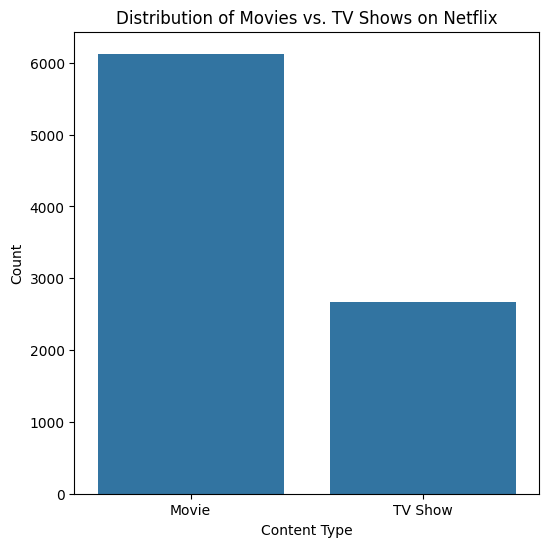

In [5]:
content_type_counts = df['type'].value_counts()
print("Distribution of Content Types:")
display(content_type_counts)

plt.figure(figsize=(6, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values)
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

Top 10 Most Common Genres:


,count
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1349
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


/tmp/ipython-input-3175011731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


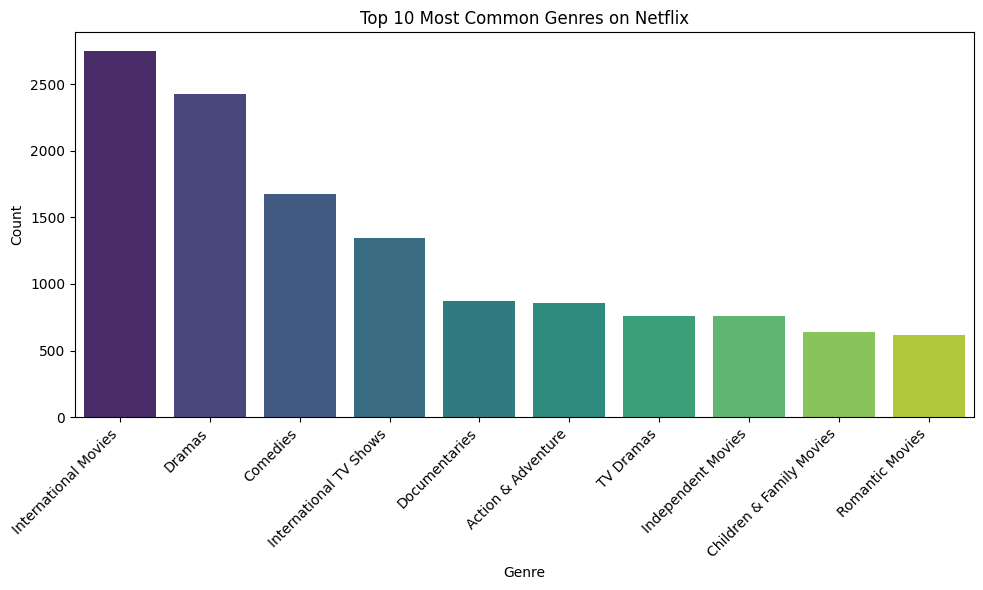

In [6]:
genres = df['listed_in'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts().head(10)

print("Top 10 Most Common Genres:")
display(genre_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

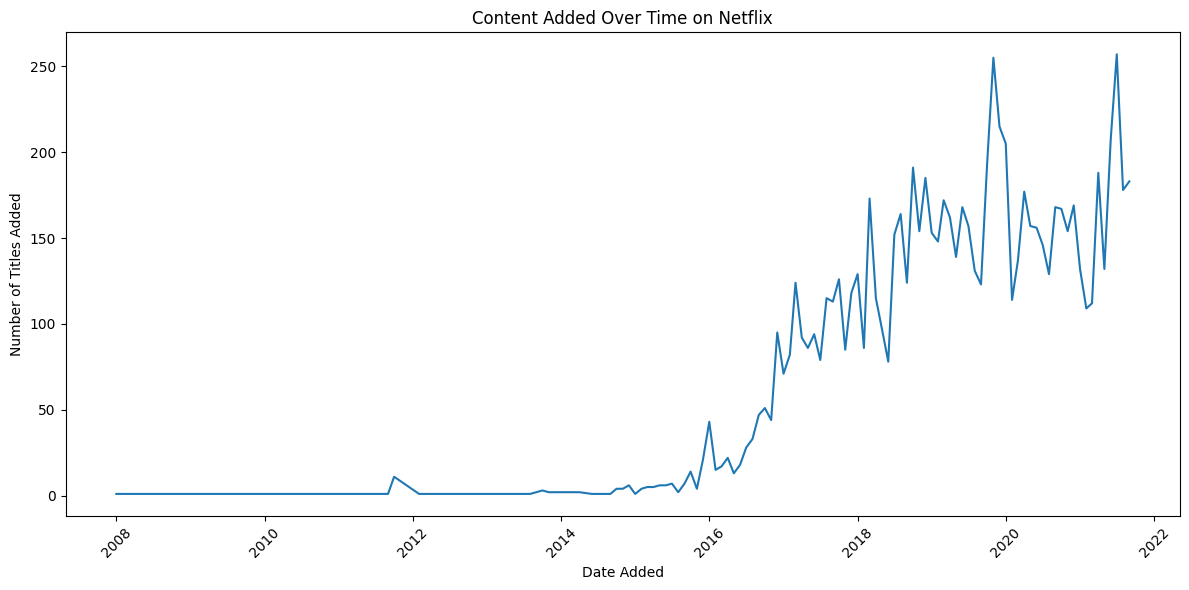

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

content_added_over_time = df.groupby(['year_added', 'month_added']).size().reset_index(name='count')
content_added_over_time['date'] = pd.to_datetime(content_added_over_time['year_added'].astype(str) + '-' + content_added_over_time['month_added'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='count', data=content_added_over_time)
plt.title('Content Added Over Time on Netflix')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Directors with the Most Titles:


,count
director,
Rajiv Chilaka,20
"Raúl Campos, Jan Suter",18
Alastair Fothergill,18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12


/tmp/ipython-input-2415371230.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.index, y=director_counts.values, palette='viridis')


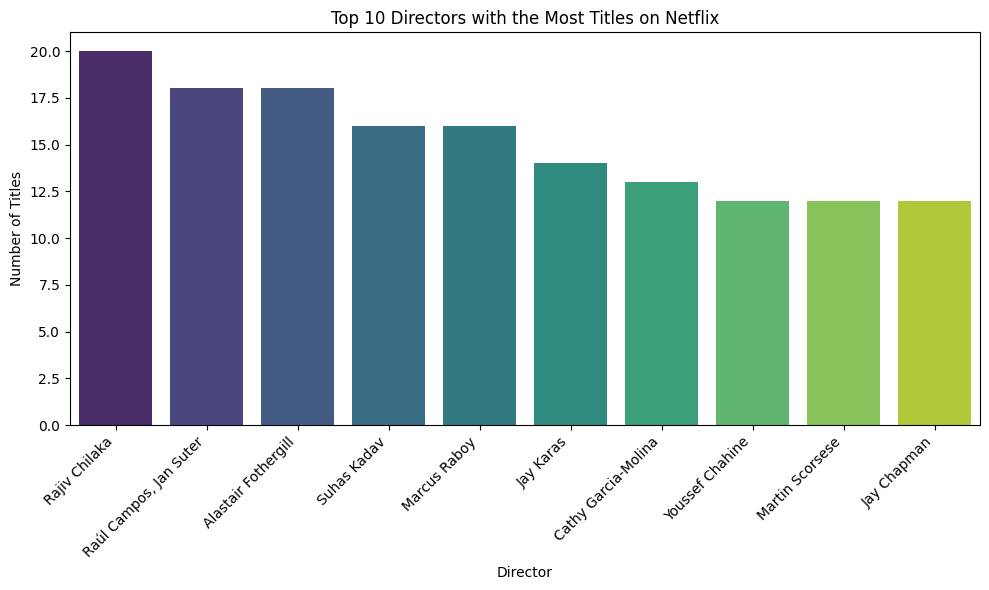

In [8]:
director_counts = df[df['director'] != 'Not Given']['director'].value_counts().head(10)

print("Top 10 Directors with the Most Titles:")
display(director_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.index, y=director_counts.values, palette='viridis')
plt.title('Top 10 Directors with the Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
!pip install wordcloud

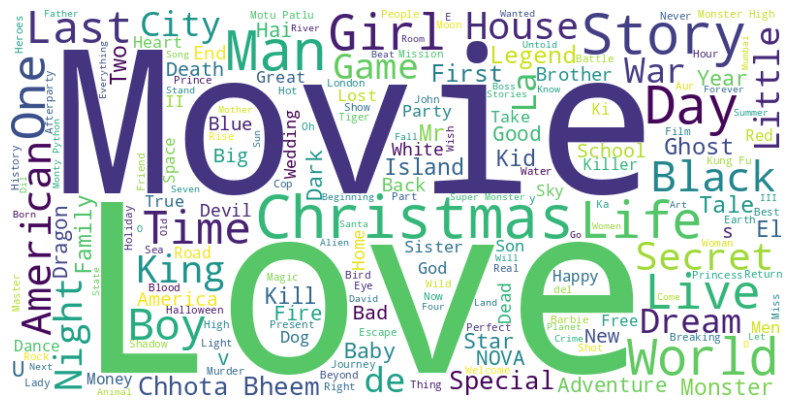

In [10]:
from wordcloud import WordCloud

movie_titles = df[df['type'] == 'Movie']['title'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()